In [52]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [53]:
from src.load_images import set_database, get_dataset_path
from src.show_images import show_img, show_imgs

In [54]:
set_database("custom")
IMAGE_NAME = "image.jpg"

In [55]:
colored_img_origin = cv2.imread(get_dataset_path(IMAGE_NAME), cv2.IMREAD_COLOR)
colored_img_origin = cv2.cvtColor(colored_img_origin, cv2.COLOR_BGR2RGB)
colored_img = colored_img_origin / 255

gray_img_origin = cv2.imread(get_dataset_path(IMAGE_NAME), cv2.IMREAD_GRAYSCALE)
gray_img_origin = cv2.cvtColor(gray_img_origin, cv2.COLOR_BGR2RGB)
gray_img = gray_img_origin / 255

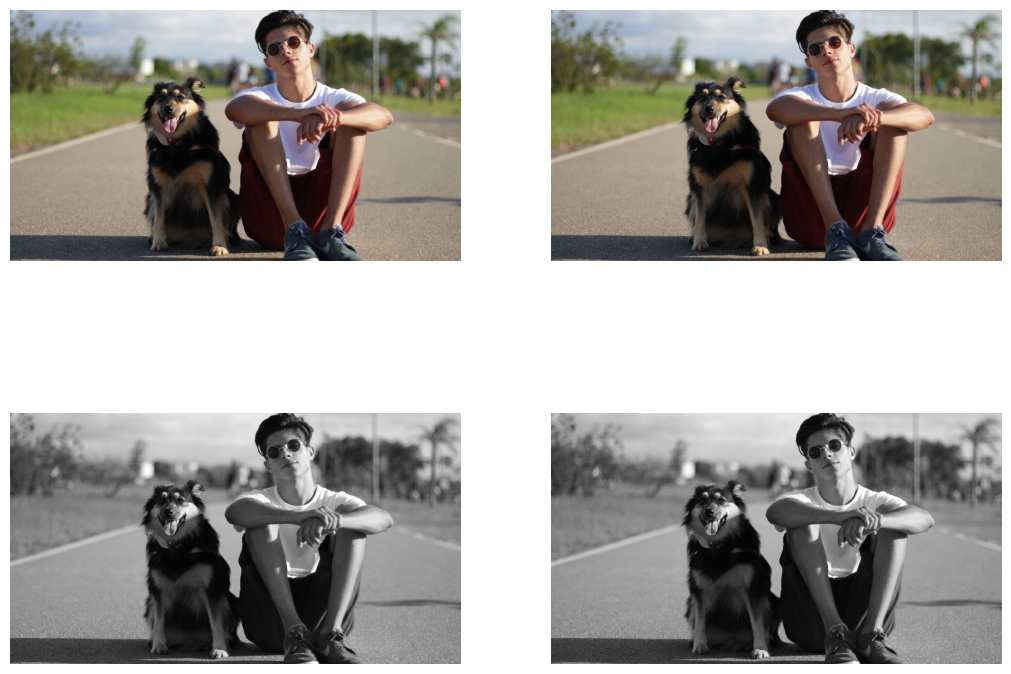

In [56]:
show_imgs([colored_img_origin, colored_img, gray_img_origin, gray_img], 2)

In [86]:
def changer(y, x, subImage: np.ndarray) -> float:
    return subImage[y, x]

def mapSpactialWindow(img, changers, k):
    newImgs = [np.ndarray(img.shape)] * len(changers)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            neighers = img[int(max(y-k, 0)):int(min(y+k, img.shape[0] - 1)), int(max(x-k, 0)):int(min(x+k, img.shape[1] - 1))]
            for i in range(len(changers)):
                newImgs[i][y, x] = changers[i](int(min(y, k - 1)), int(min(x, k - 1)), neighers)
        
    return newImgs

def mapSpactialSingleWindow(img, changer, k):
    return mapSpactialWindow(img, [changer], k)[0]

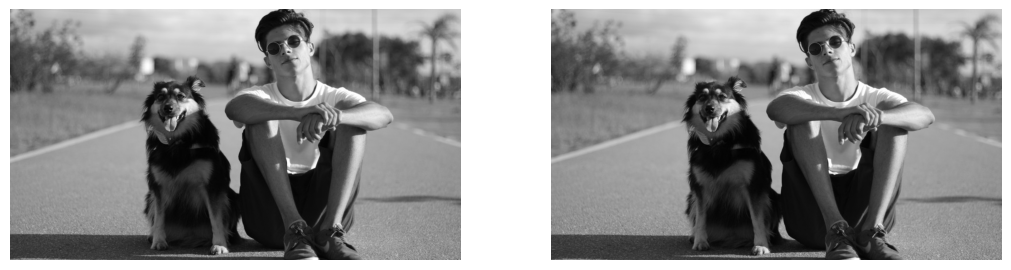

In [87]:
img = mapSpactialSingleWindow(gray_img, changer, 1)
show_imgs([gray_img, img])

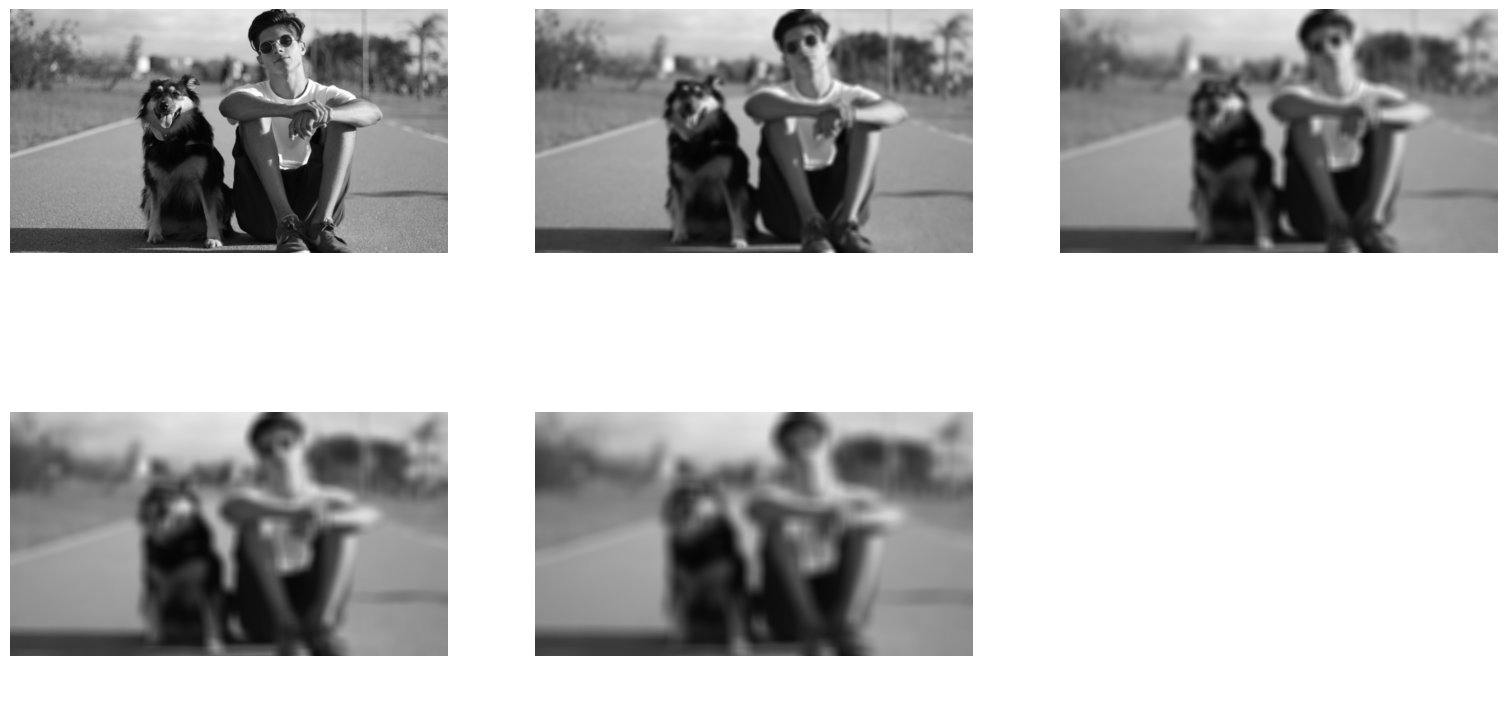

In [88]:
def changer(y, x, subImage: np.ndarray) -> float:
    return np.average(subImage)

imgs = []
for k in range(1, 20, 4):
    imgs += [mapSpactialSingleWindow(gray_img, changer, k)]

show_imgs(imgs, 3)

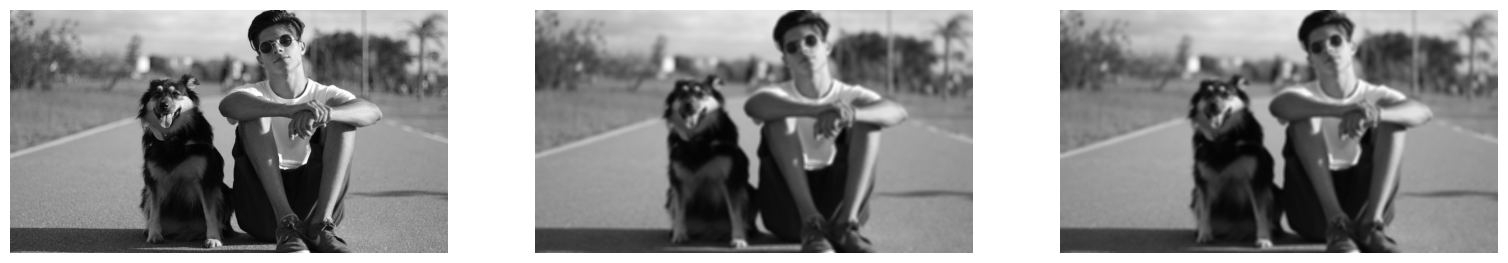

In [96]:
def changer1(y, x, subImage: np.ndarray) -> float:
    return np.median(subImage)

def changer2(y, x, subImage: np.ndarray) -> float:
    return np.average(subImage)

show_imgs([gray_img] + mapSpactialWindow(gray_img, [changer1, changer2], 4))